# Comparing Sentiment of COVID vs Non-COVID Tweets

In [1]:
import sys  
sys.path.insert(0, '/Users/lclark/data_bootcamp/data-science-final-project/scripts/')
# Import custom functions 
from functions import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lclark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Import Labelled Tweets

# I need to include the "is_retweet" feautre and repickle the VADER labelled tweets, in order for this notebook to be reproducible.
#reproducible = pd.read_pickle('~/data-science-final-project/data/bcpoli_vader_labelled_tweets.sav')
tweets = pd.read_pickle('/Users/lclark/data_bootcamp/data-science-final-project/data/bcpoli_labelled_tweets.pkl')

In [3]:
tweets = tweets[['created_at', 'vader_label', 'covid_mention', 'is_retweet', 'compound']]

# vader_label will be aggregated as count, to create a daily tweet count after resampled DataFrames by Day
tweets.rename(columns={'vader_label':'tweet_count'},inplace=True)

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420636 entries, 1294232573636304896 to 1333476911771598848
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   created_at     420636 non-null  datetime64[ns, UTC]
 1   tweet_count    420636 non-null  int8               
 2   covid_mention  420636 non-null  int64              
 3   is_retweet     420636 non-null  int64              
 4   compound       420636 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), int8(1)
memory usage: 16.4 MB


In [5]:
tweets.describe()

,tweet_count,covid_mention,is_retweet,compound
count,420636.000000,420636.000000,420636.000000,420636.000000
mean,2.383343,0.306079,0.731987,0.118705
std,1.746764,0.460864,0.442925,0.493101
min,0.000000,0.000000,0.000000,-0.992600
25%,0.000000,0.000000,0.000000,-0.250000
50%,2.000000,0.000000,1.000000,0.025800
75%,4.000000,1.000000,1.000000,0.526700
max,4.000000,1.000000,1.000000,0.987200


In [6]:
tweets_covid = tweets[tweets['covid_mention'] == 1]
tweets_no_covid = tweets[tweets['covid_mention'] == 0]

## All Tweets, with and without COVID

In [7]:
tweets_covid.describe()

,tweet_count,covid_mention,is_retweet,compound
count,128748.000000,128748.0,128748.000000,128748.000000
mean,2.266086,1.0,0.740384,0.073257
std,1.743937,0.0,0.438425,0.471893
min,0.000000,1.0,0.000000,-0.986100
25%,0.000000,1.0,0.000000,-0.275500
50%,2.000000,1.0,1.000000,0.000000
75%,4.000000,1.0,1.000000,0.440400
max,4.000000,1.0,1.000000,0.985500


In [8]:
tweets_no_covid.describe()

,tweet_count,covid_mention,is_retweet,compound
count,291888.000000,291888.0,291888.000000,291888.000000
mean,2.435064,0.0,0.728283,0.138752
std,1.745510,0.0,0.444846,0.500863
min,0.000000,0.0,0.000000,-0.992600
25%,0.000000,0.0,0.000000,-0.226300
50%,4.000000,0.0,1.000000,0.082300
75%,4.000000,0.0,1.000000,0.571900
max,4.000000,0.0,1.000000,0.987200


## Separate Original Tweets from Retweets

In [9]:
original_tweets = tweets[tweets['is_retweet'] == 0]
retweets = tweets[tweets['is_retweet'] == 1]

## Separate COVID from Non-COVID Tweets and Retweets


In [78]:
original_covid = original_tweets[original_tweets['covid_mention'] == 1]
original_no_covid = original_tweets[original_tweets['covid_mention'] == 0]

# Resample original tweets by day

original_covid = original_covid.resample('D', on='created_at').agg({'tweet_count':['count'],
                                                                    'covid_mention':['sum'],
                                                                    'compound':['mean']}).reset_index()

original_no_covid = original_no_covid.resample('D', on='created_at').agg({'tweet_count':['count'],
                                                                          'covid_mention':['sum'],
                                                                          'compound':['mean']}).reset_index()

In [79]:
# Tuple Col Names to String

original_covid.columns = [str(s) for s in original_covid.columns]
original_no_covid.columns = [str(s) for s in original_no_covid.columns]

In [80]:
# Find a better way to avoid having to rename the .agg columns this way

original_covid.rename({"('created_at', '')":'Date',
                       "('tweet_count', 'count')":'Tweet Count',
                       "('compound', 'mean')": 'Original Tweet Covid Sentiment',
                       "('covid_mention', 'sum')":'Covid Mentions'}, axis=1, inplace=True)

original_covid.Date = original_covid.Date.apply(lambda x: x.strftime('%Y-%m-%d'))
original_covid.set_index('Date',inplace=True)

original_no_covid.rename({"('created_at', '')":'Date',
                           "('compound', 'mean')":'Original Tweet Non-Covid Sentiment',
                           "('tweet_count', 'count')": 'Tweet Count',
                           "('covid_mention', 'sum')":'Covid Mentions'}, axis=1, inplace=True)

original_no_covid.Date = original_no_covid.Date.apply(lambda x: x.strftime('%Y-%m-%d'))
original_no_covid.set_index('Date',inplace=True)


In [81]:
original_covid

,Tweet Count,Covid Mentions,Original Tweet Covid Sentiment
Date,,,
2020-08-14,188,188,0.096509
2020-08-15,215,215,0.094119
2020-08-16,177,177,0.054634
2020-08-17,371,371,0.052060
2020-08-18,200,200,0.053789
...,...,...,...
2020-11-26,477,477,0.056473
2020-11-27,519,519,0.011599
2020-11-28,430,430,0.037322


In [82]:
retweets_covid = retweets[retweets['covid_mention'] == 1]
retweets_no_covid = retweets[retweets['covid_mention'] == 0]

# Resample retweets by day

retweets_covid = retweets_covid.resample('D', on='created_at').agg({'tweet_count':['count'],
                                                                    'covid_mention':['sum'],
                                                                    'compound':['mean']}).reset_index()

retweets_no_covid = retweets_no_covid.resample('D', on='created_at').agg({'tweet_count':['count'],
                                                                    'covid_mention':['sum'],
                                                                    'compound':['mean']}).reset_index()

In [83]:
# Tuple Col Names to String

retweets_covid.columns = [str(s) for s in retweets_covid.columns]
retweets_no_covid.columns = [str(s) for s in retweets_no_covid.columns]

In [84]:
# Find a better way to avoid having to rename the .agg columns this way

retweets_covid.rename({"('created_at', '')":'Date',
                       "('tweet_count', 'count')":'Tweet Count',
                       "('compound', 'mean')": 'RT Covid Sentiment',
                       "('covid_mention', 'sum')":'Covid Mentions'}, axis=1, inplace=True)

retweets_covid.Date = retweets_covid.Date.apply(lambda x: x.strftime('%Y-%m-%d'))
retweets_covid.set_index('Date',inplace=True)

retweets_no_covid.rename({"('created_at', '')":'Date',
                           "('compound', 'mean')":'RT Non-Covid Sentiment',
                           "('tweet_count', 'count')": 'Tweet Count',
                           "('covid_mention', 'sum')":'Covid Mentions'}, axis=1, inplace=True)

retweets_no_covid.Date = retweets_no_covid.Date.apply(lambda x: x.strftime('%Y-%m-%d'))
retweets_no_covid.set_index('Date',inplace=True)


## Original Tweets, with and without COVID

In [85]:
original_covid.describe()

,Tweet Count,Covid Mentions,Original Tweet Covid Sentiment
count,109.000000,109.000000,109.000000
mean,306.651376,306.651376,0.064978
std,132.981855,132.981855,0.051585
min,108.000000,108.000000,-0.044906
25%,215.000000,215.000000,0.037666
50%,287.000000,287.000000,0.058516
75%,358.000000,358.000000,0.087878
max,868.000000,868.000000,0.253233


In [86]:
original_no_covid.describe()

,Tweet Count,Covid Mentions,Original Tweet Non-Covid Sentiment
count,109.000000,109.0,109.000000
mean,727.623853,0.0,0.108249
std,592.039128,0.0,0.048884
min,212.000000,0.0,-0.018679
25%,344.000000,0.0,0.079028
50%,510.000000,0.0,0.100501
75%,1020.000000,0.0,0.129100
max,4000.000000,0.0,0.252743


## Retweets, with and without COVID

In [87]:
retweets_covid.describe()

,Tweet Count,Covid Mentions,RT Covid Sentiment
count,109.000000,109.000000,109.000000
mean,874.522936,874.522936,0.079077
std,433.949190,433.949190,0.090369
min,176.000000,176.000000,-0.186196
25%,572.000000,572.000000,0.022701
50%,816.000000,816.000000,0.072784
75%,1047.000000,1047.000000,0.126513
max,2378.000000,2378.000000,0.479005


In [88]:
retweets_no_covid.describe()

,Tweet Count,Covid Mentions,RT Non-Covid Sentiment
count,109.000000,109.0,109.000000
mean,1950.247706,0.0,0.116634
std,1601.486128,0.0,0.071161
min,396.000000,0.0,-0.090109
25%,888.000000,0.0,0.073434
50%,1241.000000,0.0,0.120733
75%,2898.000000,0.0,0.161425
max,11090.000000,0.0,0.311772


In [89]:
retweets_covid

,Tweet Count,Covid Mentions,RT Covid Sentiment
Date,,,
2020-08-14,585,585,-0.079531
2020-08-15,591,591,0.126513
2020-08-16,845,845,0.479005
2020-08-17,847,847,0.152638
2020-08-18,587,587,0.095196
...,...,...,...
2020-11-26,1254,1254,0.261110
2020-11-27,1232,1232,0.020154
2020-11-28,1355,1355,0.021101


## Visualizing the Impact

In [108]:
# Combined Original Tweets

combined_original = original_covid.join(original_no_covid, lsuffix='_cov', rsuffix='_no_cov')

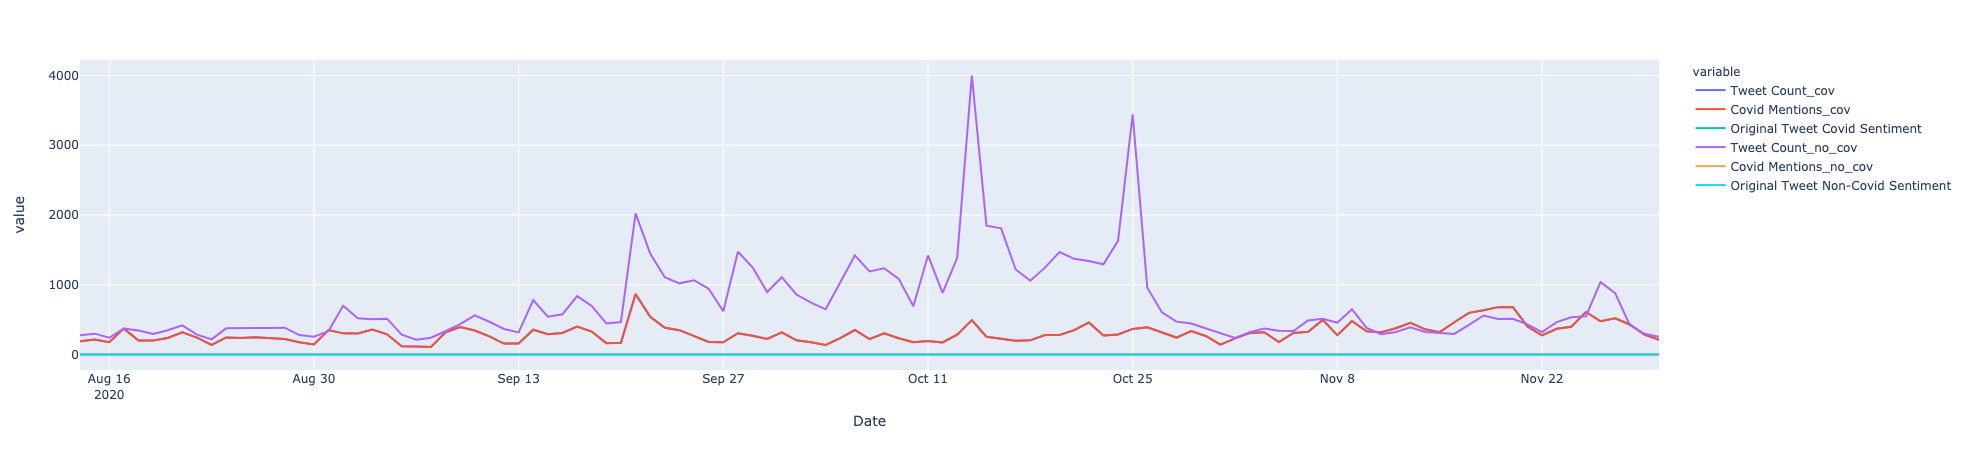

In [105]:
import plotly.express as px

fig = px.line(combined_original)
fig.show()

In [109]:
combined_RT = retweets_covid.join(retweets_no_covid, lsuffix='_cov', rsuffix='_no_cov')

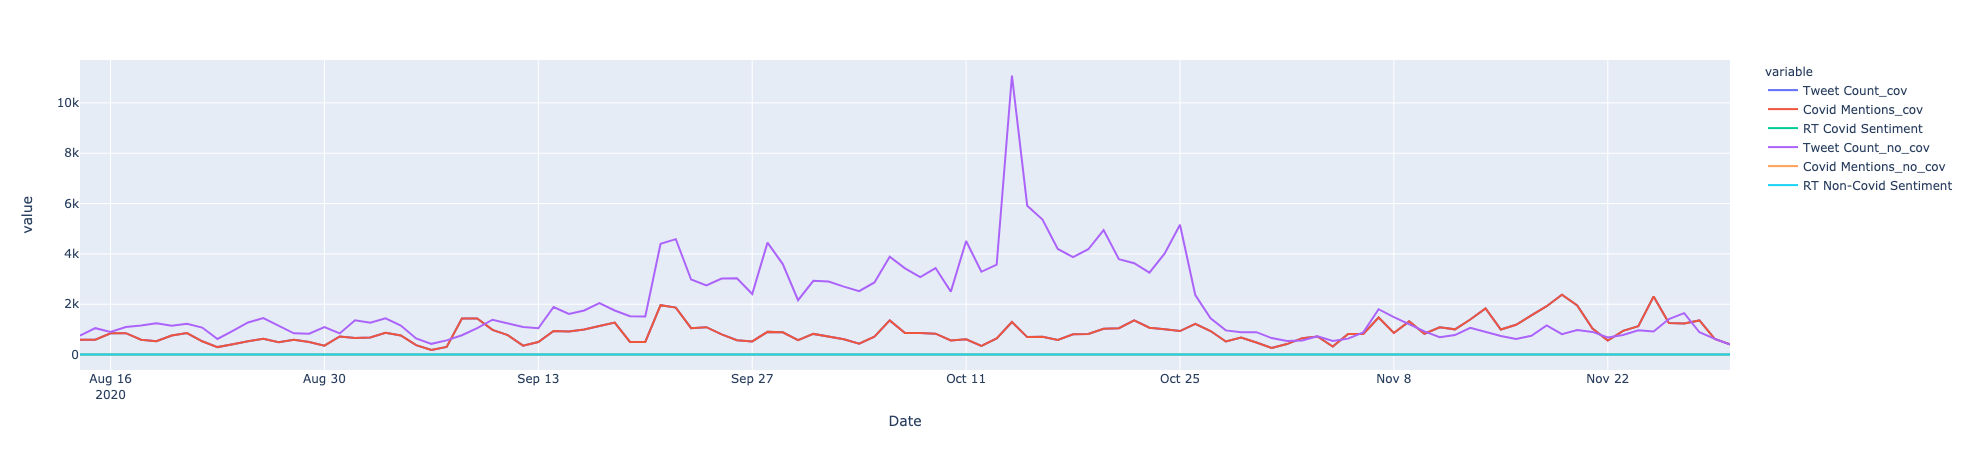

In [110]:
import plotly.express as px

fig = px.line(combined_RT)
fig.show()